<a href="https://colab.research.google.com/github/Shivansh010/Pima-Indians-Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files

uploaded = files.upload() # here we will upload red wine quality file

for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving diabetes.csv to diabetes.csv
You uploaded file "diabetes.csv" with length 23873 bytes


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166,0.346906
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check how many zero values are there in columns

In [ ]:
print('Number of rows with 0 Glucose are : {}'.format(sum(df['Glucose']==0)))
print('Number of rows with 0 BloodPressure are : {}'.format(sum(df['BloodPressure']==0)))
print('Number of rows with 0 SkinThickness are : {}'.format(sum(df['SkinThickness']==0)))
print('Number of rows with 0 Insulin are : {}'.format(sum(df['Insulin']==0)))
print('Number of rows with 0 BMI Glucose are : {}'.format(sum(df['BMI']==0)))



Number of rows with 0 Glucose are : 5
Number of rows with 0 BloodPressure are : 24
Number of rows with 0 SkinThickness are : 176
Number of rows with 0 Insulin are : 290
Number of rows with 0 BMI Glucose are : 7


Need to impute Glucose, Blood pressure, Skinthickness, Insulin, BMI

Print the summary of columns after removing non zero values from the columns

In [ ]:
for i in df.columns.values:
  temp_index = df[i].to_numpy().nonzero()
  print(df.iloc[temp_index][i].describe()) 

count    523.000000
mean       4.393881
std        3.166171
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
count    609.000000
mean     121.847291
std       30.225545
min       44.000000
25%      100.000000
50%      118.000000
75%      139.000000
max      199.000000
Name: Glucose, dtype: float64
count    590.000000
mean      72.238983
std       12.343231
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
count    438.000000
mean      28.595890
std        9.960502
min        8.000000
25%       21.000000
50%       28.500000
75%       36.000000
max       63.000000
Name: SkinThickness, dtype: float64
count    324.000000
mean     154.330247
std      119.818408
min       14.000000
25%       78.000000
50%      120.000000
75%      183.250000
max      846.000000
Name: Insulin, dtype: float64
count    607.000000
mean      32.3


*   Can impute Glucose column with mean
*   Can impute blood pressure column with mean 
*   Need to remove outliers from pregnancies, BloodPressure, skin fold, insulin, BMI, DiabetesPedigreefunction and Age  columns



In [ ]:
# Upper outliers
print('Fraction of outliers in column SkinfoldThickness is : {}'.format(sum(df['SkinThickness']>55)/len(df.iloc[df['SkinThickness'].to_numpy().nonzero()]['SkinThickness'])))
print('Fraction of outliers in column Insulin is : {}'.format(sum(df['Insulin']>400)/len(df.iloc[df['Insulin'].to_numpy().nonzero()]['Insulin'])))
print('Fraction of outliers in column BMI is : {}'.format(sum(df['BMI']>45)/len(df.iloc[df['BMI'].to_numpy().nonzero()]['BMI'])))
print('Fraction of outliers in column DiabetesPedigreeFunction is : {}'.format(sum(df['DiabetesPedigreeFunction']>1)/len(df.iloc[df['DiabetesPedigreeFunction'].to_numpy().nonzero()]['DiabetesPedigreeFunction'])))
print('Fraction of outliers in column Pregnancies is : {}'.format(sum(df['Pregnancies']>9)/len(df.iloc[df['Pregnancies'].to_numpy().nonzero()]['Pregnancies'])))
print('Fraction of outliers in column BloodPressure is : {}'.format(sum(df['BloodPressure']>110)/len(df.iloc[df['BloodPressure'].to_numpy().nonzero()]['BloodPressure'])))

Fraction of outliers in column SkinfoldThickness is : 0.0045662100456621
Fraction of outliers in column Insulin is : 0.05246913580246913
Fraction of outliers in column BMI is : 0.047775947281713346
Fraction of outliers in column DiabetesPedigreeFunction is : 0.06677524429967427
Fraction of outliers in column Pregnancies is : 0.08030592734225621
Fraction of outliers in column BloodPressure is : 0.001694915254237288




*   Remove all rows with value greater than 55 in Skinfold column
*   Remove all rows with value greater than 600 in Insulin column
*   Remove all rows with value greater than 50 in BMI column
*   Remove all rows with value greater than 1.5 in Pedigree function column
*   Remove all rows with value greater than 13 in Preganancies column



In [ ]:
df = df.loc[df['SkinThickness']<=55]
df = df.loc[df['Insulin']<=600]
df = df.loc[df['BMI']<=50]
df = df.loc[df['DiabetesPedigreeFunction']<=1.5]
df = df.loc[df['Pregnancies']<=13]
df = df.loc[df['BloodPressure']<=110] 

In [ ]:
# Lower outliers
print('Fraction of outliers in column SkinfoldThickness is : {}'.format(sum(df['SkinThickness']<10)/len(df.iloc[df['SkinThickness'].to_numpy().nonzero()]['SkinThickness'])))
print('Fraction of outliers in column Insulin is : {}'.format(sum(df['Insulin']<20)/len(df.iloc[df['Insulin'].to_numpy().nonzero()]['Insulin'])))
print('Fraction of outliers in column Glucose is : {}'.format(sum(df['Glucose']<50)/len(df.iloc[df['Glucose'].to_numpy().nonzero()]['Glucose'])))
print('Fraction of outliers in column BloodPressure is : {}'.format(sum(df['BloodPressure']<40)/len(df.iloc[df['BloodPressure'].to_numpy().nonzero()]['BloodPressure'])))

Fraction of outliers in column SkinfoldThickness is : 0.4152744630071599
Fraction of outliers in column Insulin is : 0.9285714285714286
Fraction of outliers in column Glucose is : 0.010221465076660987
Fraction of outliers in column BloodPressure is : 0.04753521126760563


In [ ]:
df = df.loc[(df['SkinThickness']>=10) | (df['SkinThickness']==0)]
df = df.loc[(df['Insulin']>=20) | (df['Insulin']==0)]
df = df.loc[(df['Glucose']>=50) | (df['Glucose']==0)]
df = df.loc[(df['BloodPressure']>=40) | (df['BloodPressure']==0)]

Now we have to impute the columns with 0 values



In [ ]:
print('Number of rows with 0 Glucose are : {}'.format(sum(df['Glucose']==0)))
print('Number of rows with 0 BloodPressure are : {}'.format(sum(df['BloodPressure']==0)))
print('Number of rows with 0 SkinThickness are : {}'.format(sum(df['SkinThickness']==0)))
print('Number of rows with 0 Insulin are : {}'.format(sum(df['Insulin']==0)))
print('Number of rows with 0 BMI Glucose are : {}'.format(sum(df['BMI']==0)))

Number of rows with 0 Glucose are : 5
Number of rows with 0 BloodPressure are : 24
Number of rows with 0 SkinThickness are : 172
Number of rows with 0 Insulin are : 282
Number of rows with 0 BMI Glucose are : 6


Impute Glucose and Blood pressure with mean

In [ ]:
df['Glucose'] = df['Glucose'].replace(0, df.iloc[df['Glucose'].to_numpy().nonzero()]['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df.iloc[df['BloodPressure'].to_numpy().nonzero()]['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df.iloc[df['BMI'].to_numpy().nonzero()]['BMI'].mean())

Check correlation between columns for imputaion

In [ ]:
for i in df.columns.values:
  for j in df.columns.values:
    temp_index_i = df[i].to_numpy().nonzero()
    temp_index_j = df[j].to_numpy().nonzero()
    print('Correlation between {} and {} is : {}'.format(i,j,df.iloc[temp_index_i][i].corr(df.iloc[temp_index_j][j])))

Correlation between Pregnancies and Pregnancies is : 1.0
Correlation between Pregnancies and Glucose is : 0.16807947933798903
Correlation between Pregnancies and BloodPressure is : 0.27693710736337884
Correlation between Pregnancies and SkinThickness is : 0.18754232433471632
Correlation between Pregnancies and Insulin is : 0.13339405675283209
Correlation between Pregnancies and BMI is : 0.1180687149613441
Correlation between Pregnancies and DiabetesPedigreeFunction is : 0.04273817922541823
Correlation between Pregnancies and Age is : 0.5776269594379098
Correlation between Pregnancies and Outcome is : nan
Correlation between Glucose and Pregnancies is : 0.168079479337989
Correlation between Glucose and Glucose is : 0.9999999999999999
Correlation between Glucose and BloodPressure is : 0.21507690588022188
Correlation between Glucose and SkinThickness is : 0.12858231983516852
Correlation between Glucose and Insulin is : 0.5581404392014
Correlation between Glucose and BMI is : 0.22013081004

Observations:


*   Correlation between SkinThickness and BMI is : 0.66
*   Correlation between Insulin and Glucose is : 0.56

To do next:


*   Impute skin thickness with help of BMI
*   Impute Isulin with help of glucose





In [ ]:
df.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84.0,72.4082,0,0,32.035579,0.304,21,0
1,9,112.0,82.0000,24,0,28.200000,1.282,50,1
2,1,139.0,46.0000,19,83,28.700000,0.654,22,0
3,0,161.0,50.0000,0,0,21.900000,0.254,65,0
4,6,134.0,80.0000,37,370,46.200000,0.238,46,1
...,...,...,...,...,...,...,...,...,...
580,2,122.0,76.0000,27,200,35.900000,0.483,26,0
581,5,139.0,64.0000,35,140,28.600000,0.411,26,0
582,10,101.0,86.0000,37,0,45.600000,1.136,38,1
583,0,141.0,72.4082,0,0,42.400000,0.205,29,1


In [ ]:
# Train linear reggresion for imputation
X_BMI = df.loc[df['SkinThickness']!=0]['BMI'].to_numpy().reshape(-1,1)
Y_SkinThickness = df.loc[df['SkinThickness']!=0]['SkinThickness']

In [ ]:
reg_1 = LinearRegression().fit(X_BMI, Y_SkinThickness)
reg_1.score(X_BMI, Y_SkinThickness)

0.43323683500564125

In [ ]:
for i in range(0,len(df)):
  if df.iloc[[i],[3]].values == 0:
    df.iloc[[i],[3]] = reg_1.predict(df.iloc[[i],[5]])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,3.762393,121.684483,72.408200,28.028143,77.531624,32.035579,0.443383,33.006838,0.343590
std,3.213300,29.621449,11.266808,8.903456,106.199941,6.448888,0.276737,11.596821,0.475313
min,0.000000,56.000000,44.000000,10.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,118.000000,72.408200,28.000000,40.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,34.000000,127.000000,35.900000,0.600000,40.000000,1.000000
max,13.000000,199.000000,110.000000,52.000000,600.000000,49.700000,1.476000,81.000000,1.000000


In [ ]:
3# Train linear regression for imputation
X_Glucose = df.loc[df['Insulin']!=0]['Glucose'].to_numpy().reshape(-1,1)
Y_Insulin = df.loc[df['Insulin']!=0]['Insulin']

In [ ]:
reg_1 = LinearRegression().fit(X_Glucose, Y_Insulin)
reg_1.score(X_Glucose, Y_Insulin)

0.31152074987193157

In [ ]:
for i in range(0,len(df)):
  if df.iloc[[i],[4]].values == 0:
    df.iloc[[i],[4]] = reg_1.predict(df.iloc[[i],[1]])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,3.762393,121.684483,72.408200,28.028143,147.747122,32.035579,0.443383,33.006838,0.343590
std,3.213300,29.621449,11.266808,8.903456,85.311654,6.448888,0.276737,11.596821,0.475313
min,0.000000,56.000000,44.000000,10.000000,20.952414,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,91.519717,27.300000,0.240000,24.000000,0.000000
50%,3.000000,118.000000,72.408200,28.000000,132.683977,32.000000,0.361000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,34.000000,180.000000,35.900000,0.600000,40.000000,1.000000
max,13.000000,199.000000,110.000000,52.000000,600.000000,49.700000,1.476000,81.000000,1.000000


Now data is processed, next we have to select features for model training

Visualization

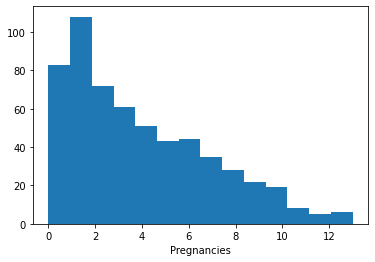

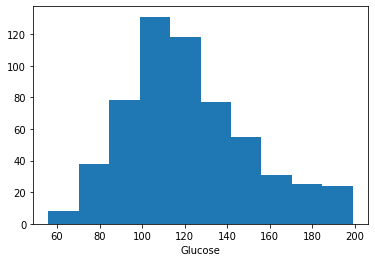

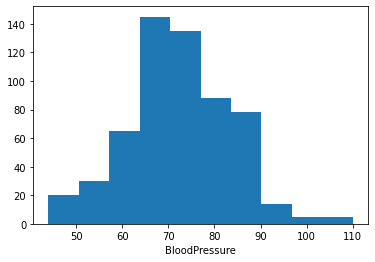

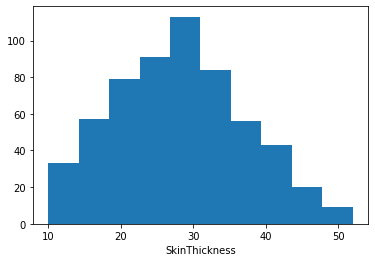

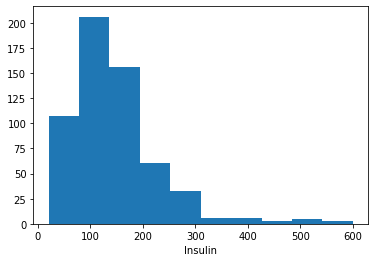

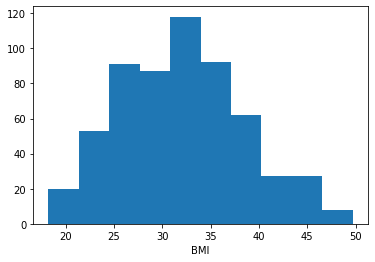

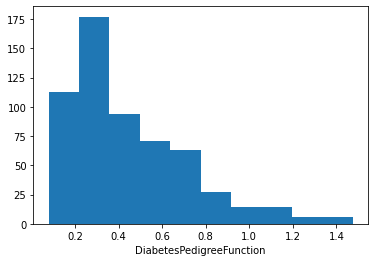

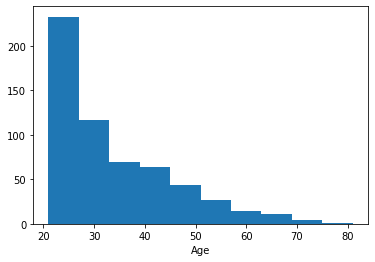

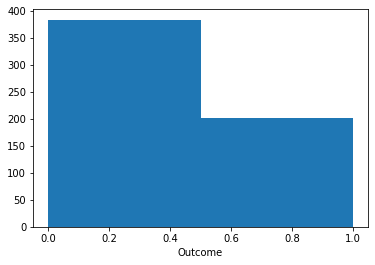

In [ ]:
# Histograms
for col in df.columns.values:
  plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
  plt.xlabel(col)
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4310fccd0>,
      dtype=object)

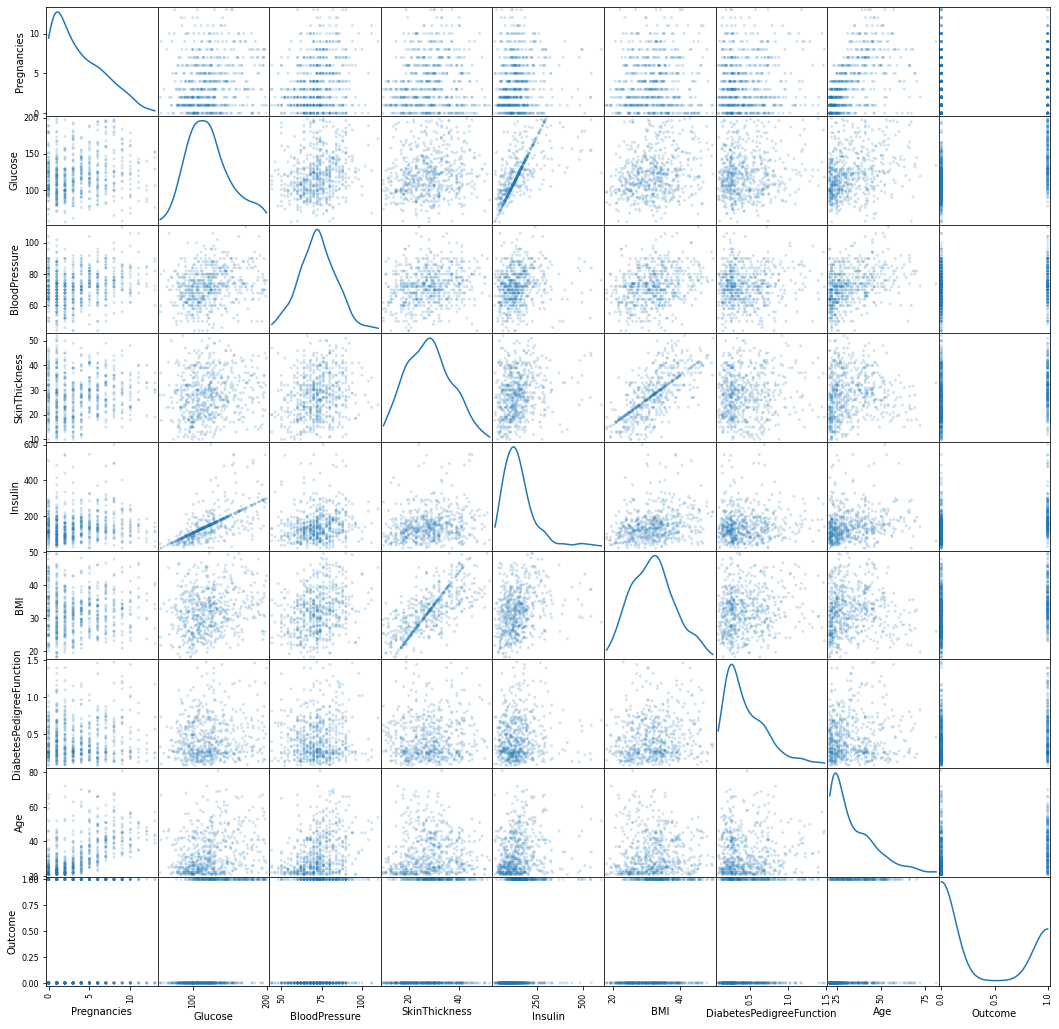

In [ ]:
# Pair wise scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(frame=df,alpha=0.2,figsize=(18,18),diagonal='kde')

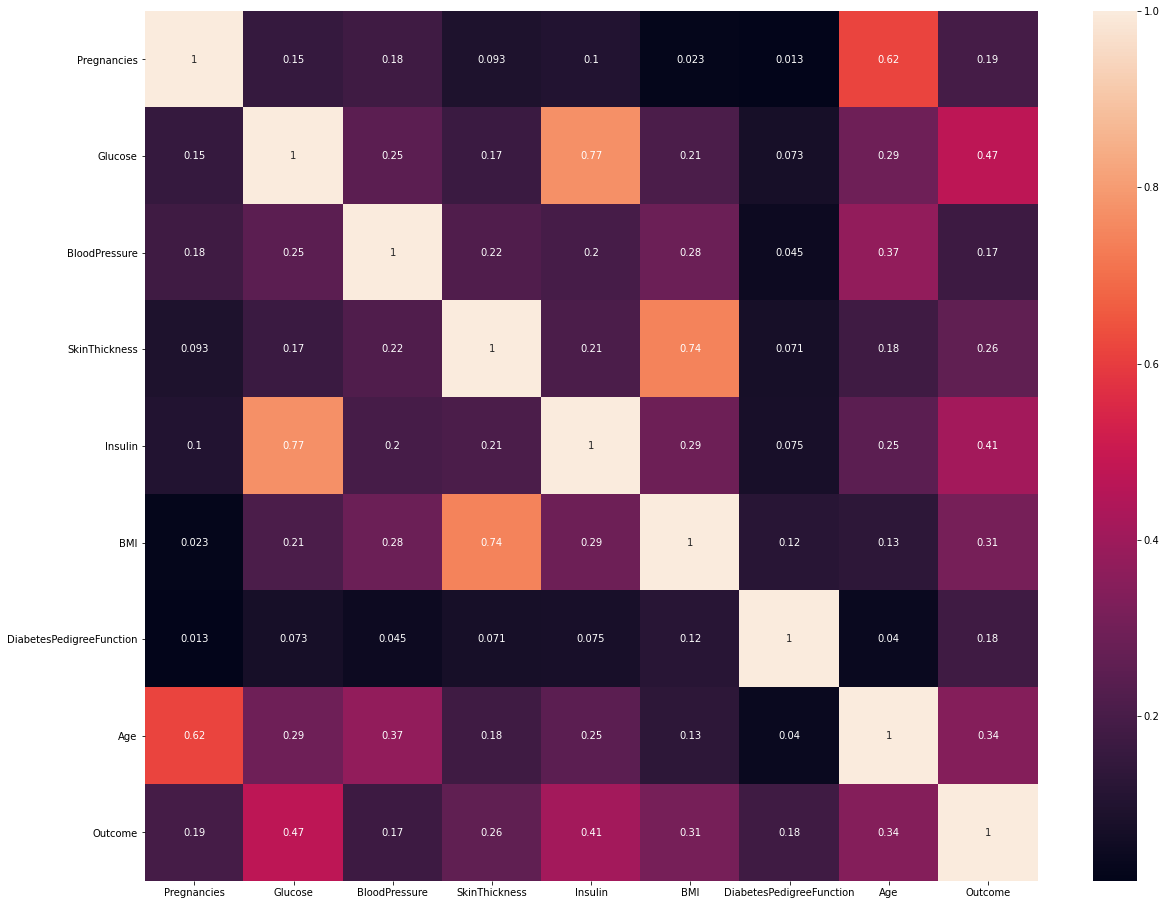

In [ ]:
corrMatrix=df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot=True)
plt.show()

Training final model

In [ ]:
X_train = df[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness',	'Insulin', 'BMI', 'DiabetesPedigreeFunction',	'Age'	]]
Y_train = df['Outcome']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

print('Training Random Forest Classifier using GridSearchCV')

scoring='accuracy' # Criterain for model selection is accuracy

model = RandomForestClassifier(random_state=0)

hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100,150,200]}

clf = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(Y_train))

print('Best parameters:')
print(clf.best_params_)
print('Best accuracy score: '+ str(abs(clf.best_score_)))



Training Random Forest Classifier using GridSearchCV
Best parameters:
{'max_depth': 5, 'n_estimators': 100}
Best accuracy score: 0.7692307692307693


In [ ]:
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.253247,121.051948,67.870130,21.084416,73.266234,32.029221,0.482675,34.571429,0.357143
std,3.567394,31.825873,22.430051,17.914449,111.334275,8.458727,0.309155,12.685155,0.480721
min,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.102000,21.000000,0.000000
25%,1.250000,96.000000,62.000000,0.000000,0.000000,28.225000,0.247250,24.000000,0.000000
50%,3.000000,112.000000,72.000000,26.000000,0.000000,32.850000,0.372500,29.500000,0.000000
75%,7.000000,146.000000,78.000000,33.000000,125.750000,36.975000,0.679250,42.000000,1.000000
max,13.000000,197.000000,114.000000,99.000000,579.000000,53.200000,1.390000,67.000000,1.000000


Impute the BP, ST, Insulin, BMI columns

In [ ]:
df_test['Glucose'] = df_test['Glucose'].replace(0, df_test.iloc[df_test['Glucose'].to_numpy().nonzero()]['Glucose'].mean())
df_test['BloodPressure'] = df_test['BloodPressure'].replace(0, df_test.iloc[df_test['BloodPressure'].to_numpy().nonzero()]['BloodPressure'].mean())
df_test['BMI'] = df_test['BMI'].replace(0, df_test.iloc[df_test['BMI'].to_numpy().nonzero()]['BMI'].mean())

Use the previously trained model to impute the Insuline, SkinThickness

In [ ]:
for i in range(0,len(df_test)):
  if df_test.iloc[[i],[3]].values == 0:
    df_test.iloc[[i],[3]] = reg_1.predict(df_test.iloc[[i],[5]])

In [ ]:
for i in range(0,len(df_test)):
  if df_test.iloc[[i],[4]].values == 0:
    df_test.iloc[[i],[4]] = reg_1.predict(df_test.iloc[[i],[1]])

In [ ]:
X_test = df_test[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness',	'Insulin', 'BMI', 'DiabetesPedigreeFunction',	'Age'	]]
Y_actual = df_test.Outcome

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_actual, clf.predict(X_test))

0.7662337662337663